# Boosting 
- A supervised machine learning strategy 
- combine the predictions of many weak (base modle) in order to generate a powerful ensemable model
- Boosting as oppossed to classiscal approaches like bagging or averaging focuses on successively training basic models in a way that emphasizes misclassified samples from prior iterations.
- The  goal is to  prioritize the samples that were categorized incorrectly in previous iterations. Allowing these misclassified smaples to be categorized correctly by repeated interations so model can learn from its mistakes and improve its performance.

## How does boosting  work?
1. Firstly, a model is build from the traning data.
2. Then the second model is build, which correct them mistakes of first model.
3. This procedure is continued until the traning dataset is predicated correctly or the maximun number of modles are added.


## How does boosting  work?
1. **Initialize Weights:** At the start of the process, each traning example is given equal weight
2. **Train a week learner:** The weighted training data is used to train a weak learner. A weak learner is simple model that outperforms random guessing marginally only. A decision tree with few level, for example, can be a weak learner.
3. **Error calculation:** The error of the weak learn on the training is computed. The weighted sum of misclassified cases consistute the error.
4. **update weights:**  Weights are updated according to the mistake rate of training examples. The weak learners are given higher weights, wherease correctly classified examples are given less weights 
5. **Repeat:** steps 2 to 4 are repeated several times. The weak learners are trained on updated weights.
6. **Combine weak learner:** In the final model all the weak learners are combined that were trained in preceding steps and  the final prediction is based on the weighted total of weak learners.
7. **Forecast:**  The finished is used forecast fresh instances

## Advantages Of Boosting
1. **Improved performence:** 
2. **Ability to handle complex data:**
3. **Robustness to Noise:**
4. **Flexibilty**
5. **Interpretability** 

## Application of Boosting Algorithms
1. **Classification problems:** such as spam detection, fraud detection and disease diagonsis.
2. **Regression problems:** such predicting stock market trends and housing prices
3. **Natural language processing:** such as sentiment analysis and text classification.
4. **Image and speech recognition:**
5. **Recomendations systems:** personlized product recomendation , movie recomendation.
6. **Time series Analysis** 

## Types of Boosting Algorithms
### 1. AdaBoost (Adaptive Boosting)
Adaboost is one the most  extensively used algorithm. It give weights to each data point in traning set based on the accuracy of prior models, and then train a new model based on the updated weights.AdaBoost is very usefull for classification tasks.
### 2. Gardient Boosting
Gradient Boosting works by fitting a model to the residual erros of prior models.it minimizes the loss function using gradient descent and may be applied to both regression and classification problmes. Popular gradient boosting implementation include XGBoost and LightGBM.
### 3. CatBoost (Categorcial Boosting) 
An open source machine learning algorithm that can handle categorically data directly and is based on gradient boosting 
### 4. Stochastic Gradient Boosting 
Similar to Gradient boosting, stochastic gradient boosting fits each new model with random subsets of traning data and random subset of features. This help to avoid overfiting and performance may be improved.
### 5. LpBoost (Linear programming Boosting)
Lpboost is a boosting algorithm that minimizes the exponential loss function using linear programming. It capable of handling wide range of loos function and maybe applied to regresion and classification tasks.
### 6. Total Boosting
Total Boost  is a LpBoost and AdaBoost. it minimizes the exponential loss and linear programming loss, and it can increase the accuracy of certian types of problems.


In [45]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

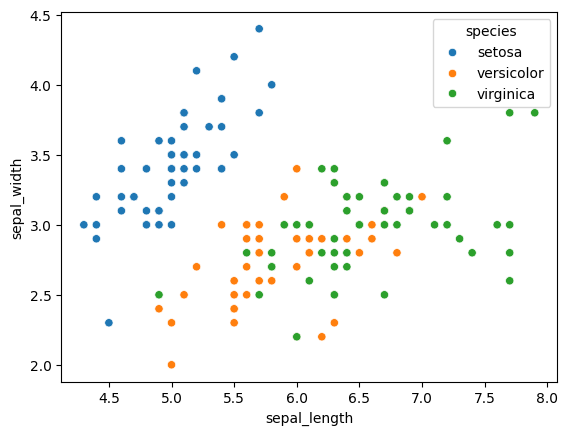

In [46]:
df= sns.load_dataset('iris')
df.head()
# plot the data using scatter plot
sns.scatterplot(df, x='sepal_length',y='sepal_width', hue='species')

classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy score: 0.9666666666666667
Recall score 0.9666666666666667
precision score: 0.9666666666666667
confusion matrix:
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
CPU times: total: 266 ms
Wall time: 291 ms


<Axes: >

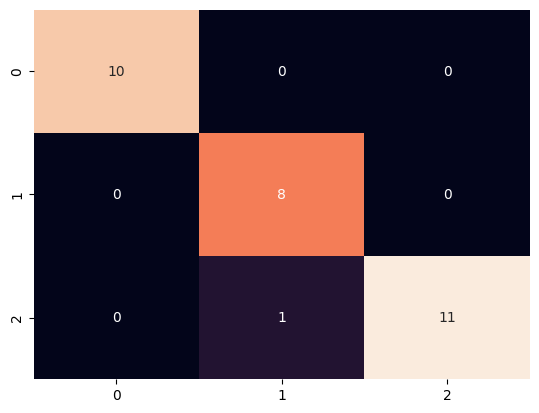

In [48]:
%%time
# let's split the data into x and y 
x=df.drop('species',axis=1)
y=df['species']
# let's split the data into traning and testing data 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
# let's call the model 
rf = RandomForestClassifier()
# fit the model on the data 
rf.fit(x_train,y_train)
# predict the model 
y_pred=rf.predict(x_test)
# Evalueate the model 
print('classification report:\n', classification_report(y_test,y_pred))
print('Accuracy score:', accuracy_score(y_test,y_pred,))
print('Recall score', recall_score(y_test, y_pred, average='micro'))
print('precision score:', precision_score(y_test, y_pred,average='micro'))
print('confusion matrix:\n', confusion_matrix( y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cbar=False)

### Decisiontree classifier 

classification reprot:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion matrix:
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
CPU times: total: 78.1 ms
Wall time: 98.5 ms


<Axes: >

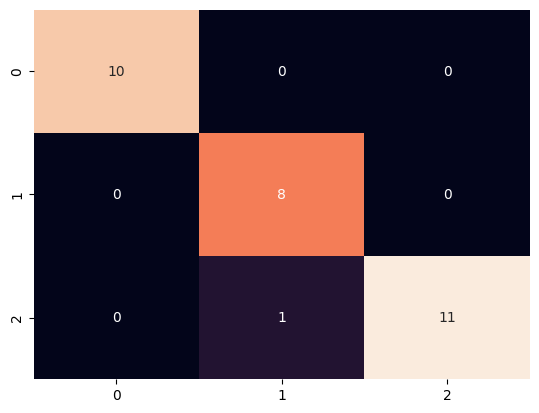

In [51]:
%%time
# let's call the model 
dt = DecisionTreeClassifier()
# fit the model on the data 
dt.fit(x_train, y_train)
#predict the model
y_pred=dt.predict(x_test)
# evaluate the model
print('classification reprot:\n', classification_report(y_test,y_pred))
print('confusion matrix:\n', confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cbar=False)

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix:
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
CPU times: total: 500 ms
Wall time: 506 ms


<Axes: >

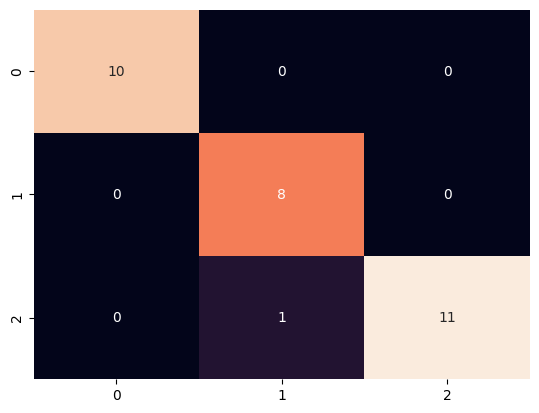

In [50]:
%%time
# let's call the model here 
gb = GradientBoostingClassifier()
# fit the model on the data 
gb.fit(x_train, y_train)
# predict the model 
y_pred= gb.predict(x_test)
# Evaluate the  model
print('Classification report:\n', classification_report(y_test,y_pred))
print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False)

----


## making algorithm on diamonda data 

In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# machine learning libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from xgboost import XGBClassifier

In [10]:
# load the datast 
df= sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
%%timeit
# let's split the data into x and y 
x = df.drop('cut', axis=1)
y = df['cut']
# let's call the labelEncoder here for label encoding 
le = LabelEncoder()
df['color']= le.fit_transform(df['color'])
df['clarity']= le.fit_transform(df['clarity'])
df['cut']= le.fit_transform(df['cut'])
# let's split the data into training and testing data 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
# let's call our model here 
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
# predict from model
y_pred= dt.predict(x_test)
# evaluate the model
print("Accuracy_score:",accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test,y_pred, average='micro'))
print("precision score:", precision_score(y_test, y_pred,average='micro'))
print("f1_score:", f1_score(y_test,y_pred,average='micro'))
print("confusion_matrix:\n", confusion_matrix(y_test,y_pred))


Accuracy_score: 0.7173711531331108
Recall score: 0.7173711531331108
precision score: 0.7173711531331108
f1_score: 0.7173711531331108
confusion_matrix:
 [[ 286   35    3    5    6]
 [  32  697   21   28  226]
 [   4   22 3427  329  510]
 [   7   57  325 2021  365]
 [   9  242  470  353 1308]]


UsageError: Line magic function `%%time` not found.


In [17]:
# using another algorithm named Randomforesclassifier
rf= RandomForestClassifier()
#fit the model on data 
rf.fit(x_train, y_train)
# prediction from model
y_pred=rf.predict(x_test)
# evaluate the model
print("Accuracy_score:",accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test,y_pred, average='micro'))
print("precision score:", precision_score(y_test, y_pred,average='micro'))
print("f1_score:", f1_score(y_test,y_pred,average='micro'))
print("confusion_matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy_score: 0.7880051909529107
Recall score: 0.7880051909529107
precision score: 0.7880051909529107
f1_score: 0.7880051909529107
confusion_matrix:
 [[ 303   18    3    7    4]
 [  24  710   21   38  211]
 [   2   11 3944  162  173]
 [   1   11  302 2276  185]
 [   3  153  512  446 1268]]


In [23]:
# Now we are going for the third model which xgboost
x = df.drop('cut',axis=1)
y= df['cut']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
xb=XGBClassifier()
xb.fit(x_train,y_train)
y_pred=xb.predict(x_test)
# Evaluate the model
print("Accuracy_score:",accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test,y_pred, average='micro'))
print("precision score:", precision_score(y_test, y_pred,average='micro'))
print("f1_score:", f1_score(y_test,y_pred,average='micro'))
print("confusion_matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy_score: 0.8056173526140156
Recall score: 0.8056173526140156
precision score: 0.8056173526140156
f1_score: 0.8056173526140155
confusion_matrix:
 [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]


In [ ]:
df=pd.read_csv('hotel_booking.csv')
df.head()
# df.drop(['name','email','credit_card','phone-number'],axis=1,inplace=True)
df.columns
df.shape

In [3]:
import pandas as pd 
df = pd.read_csv("hotel_booking.csv")
df. head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
